# Step 2 — Drift ($\mu$) & Volatility ($\sigma$) with Brownian Motion

**Goal:** move from a standard Brownian motion to a *drifted & scaled* version
$$
X_t = \mu t + \sigma W_t,
$$
understand what each parameter does, prove the key formulas (mean/variance/distribution),
and verify them numerically.


## Key facts and short proofs

### 1) Model and distribution at a fixed time
We define $X_t = \mu t + \sigma W_t$ where $(W_t)_{t\ge 0}$ is standard Brownian motion.
Then for any fixed $t>0$,
$$
X_t \sim \mathcal{N}(\,\mu t,\ \sigma^2 t\,).
$$

**Why?** $W_t\sim\mathcal N(0,t)$ and an affine transform of a normal is normal:
if $Y\sim\mathcal N(0,t)$, then $a+bY\sim\mathcal N(a, b^2 t)$.

### 2) Mean and variance
By linearity of expectation and variance of $a+bW_t$,
$$
\mathbb{E}[X_t] = \mu t, \qquad \operatorname{Var}(X_t) = \sigma^2 t.
$$

### 3) Increments over a small interval
For $\Delta t>0$,
$$
X_{t+\Delta t}-X_t \,=\, \mu\,\Delta t\ +\ \sigma\,(W_{t+\Delta t}-W_t)
\ \sim\ \mathcal N\big(\mu\,\Delta t,\ \sigma^2\,\Delta t\big),
$$
and increments over **disjoint** intervals are independent (since Brownian increments are).

### 4) Discrete simulation recipe (Euler step)
With a time grid of step $\Delta t$ and i.i.d. $Z_k\sim\mathcal N(0,1)$:
$$
X_{k+1} = X_k + \mu\,\Delta t + \sigma\,\sqrt{\Delta t}\, Z_k.
$$
This matches the previous increment law and is the standard way to simulate $X_t$.

Note : i.i.d = independent and identically distributed (the value of a step doesn't influence the next one and each step is created from the same distribution (same mean and variance))


In [1]:
# Setup
import numpy as np
import matplotlib.pyplot as plt

def simulate_X(mu=0.1, sigma=0.2, T=1.0, steps=1000, paths=1, seed=None):
    """Simulate X_t = mu t + sigma W_t.
    Returns array of shape (steps+1, paths). Grid is uniform on [0, T].
    """
    rng = np.random.default_rng(seed)
    dt = T / steps
    Z = rng.standard_normal(size=(steps, paths))
    dW = np.sqrt(dt) * Z
    W = np.vstack([np.zeros((1, paths)), np.cumsum(dW, axis=0)])
    t = np.linspace(0.0, T, steps+1).reshape(-1, 1)
    X = mu * t + sigma * W
    return t.ravel(), X


## Experiment 1 — Visualize sample paths

- Increasing $\mu$ tilts the average trend up or down.
- Increasing $\sigma$ widens the zig-zags (uncertainty grows faster).


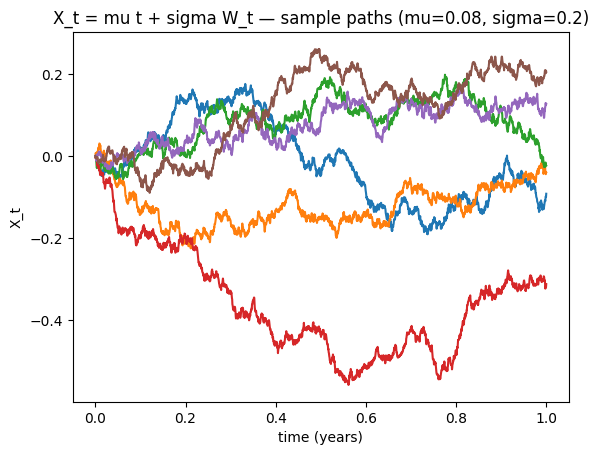

In [2]:
# Few paths, moderate mu and sigma
t, X = simulate_X(mu=0.08, sigma=0.2, T=1.0, steps=2000, paths=6, seed=7)
plt.figure()
for k in range(X.shape[1]):
    plt.plot(t, X[:, k])
plt.xlabel("time (years)")
plt.ylabel("X_t")
plt.title("X_t = mu t + sigma W_t — sample paths (mu=0.08, sigma=0.2)")
plt.show()


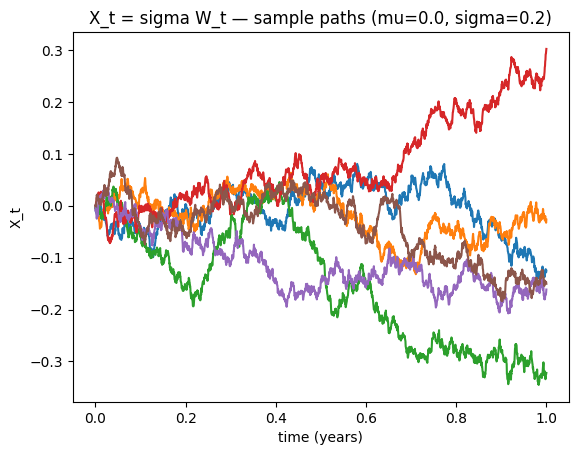

In [3]:
# Same sigma, zero drift (to see pure noise around 0)
t2, X2 = simulate_X(mu=0.0, sigma=0.2, T=1.0, steps=2000, paths=6, seed=8)
plt.figure()
for k in range(X2.shape[1]):
    plt.plot(t2, X2[:, k])
plt.xlabel("time (years)")
plt.ylabel("X_t")
plt.title("X_t = sigma W_t — sample paths (mu=0.0, sigma=0.2)")
plt.show()


## Experiment 2 — Check mean vs time: $\mathbb{E}[X_t]=\mu t$

Simulate many paths, compute the cross-sectional mean at each time and compare with the theoretical line $\mu t$.

### Goal

Show, with data, that the **average level** of the process

$$
X_t=\mu t+\sigma W_t
$$

grows on a straight line with slope **μ**, i.e. $\mathbb{E}[X_t]=\mu t$. In other words, **μ controls the trend**; σ does **not** change the mean trend (σ only changes how much paths wiggle around that line).

### What you do

1. Simulate many independent paths of $X_t$ on $[0,T]$ with given μ and σ.
2. At each time $t$ on the grid, compute the **cross-sectional mean** (average across all paths).
3. Plot that sample mean and overlay the theoretical line $\mu t$.

### What you should see

* The sample mean curve sits **on top of** (or oscillates tightly around) the dashed line $\mu t$.
* If you increase the number of paths $N$, the curve sticks even closer to $\mu t$.
  (Standard error at time $t$ is $\text{SE} \approx \sigma\sqrt{t/N}$: bigger $N$ → smaller wiggle.)

### Why it matters

* It empirically confirms the model’s key prediction for the **first moment** (the mean).
* It isolates the role of **μ**: raising μ tilts the line up; lowering μ tilts it down.
* It also shows **σ doesn’t affect the average trend**—only the **spread** around it (handled in Experiment 3).

### How to interpret deviations

* Small gaps between the sample mean and $\mu t$ are just sampling noise. Reduce them by increasing **paths** (and/or repeating with a different random seed).
* Large, systematic deviations usually mean a bug (wrong dt, mixing increments with levels, or not averaging across paths).



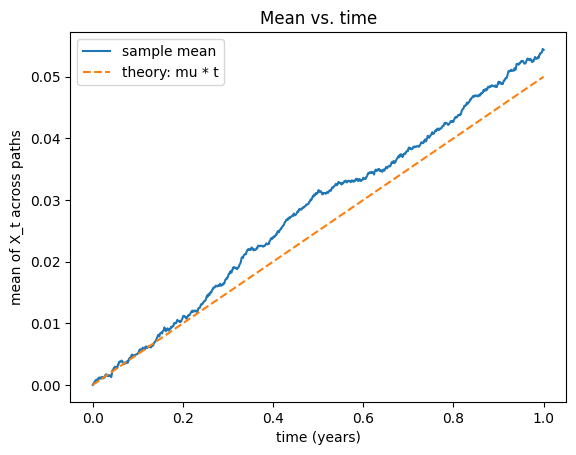

In [7]:
T, steps, paths = 1.0, 1000, 5000
mu, sigma = 0.05, 0.3
t, X = simulate_X(mu=mu, sigma=sigma, T=T, steps=steps, paths=paths, seed=123)

mean_across_paths = X.mean(axis=1)
theory = mu * t

plt.figure()
plt.plot(t, mean_across_paths, label="sample mean")
plt.plot(t, theory, linestyle="--", label="theory: mu * t")
plt.xlabel("time (years)")
plt.ylabel("mean of X_t across paths")
plt.title("Mean vs. time")
plt.legend()
plt.show()


## Experiment 3 — Check variance vs time: $\operatorname{Var}(X_t)=\sigma^2 t$

Compute the cross-sectional variance at each time and compare with $\sigma^2 t$.


In [ ]:
var_across_paths = X.var(axis=1, ddof=1)
theory_var = (sigma**2) * t

plt.figure()
plt.plot(t, var_across_paths, label="sample variance")
plt.plot(t, theory_var, linestyle="--", label="theory: sigma^2 * t")
plt.xlabel("time (years)")
plt.ylabel("variance of X_t across paths")
plt.title("Variance vs. time")
plt.legend()
plt.show()


## Experiment 4 — Increments over $\Delta t$ are Normal with mean $\mu\Delta t$ and variance $\sigma^2\Delta t$

Take one grid step $\Delta t=T/\text{steps}$ and collect all increments $X_{k+1}-X_k$.


In [ ]:
dt = T / steps
increments = np.diff(X, axis=0).ravel()  # all paths, all steps

# Empirical mean/variance
m = increments.mean()
v = increments.var(ddof=1)

print(f"Empirical mean ≈ {m:.6f} | theory: mu*dt = {mu*dt:.6f}")
print(f"Empirical var  ≈ {v:.6f} | theory: sigma^2*dt = {(sigma**2)*dt:.6f}")

# Histogram + normal overlay (using empirical mean/var for visual fit)
plt.figure()
count, bins, _ = plt.hist(increments, bins=60, density=True, alpha=0.7)
from math import sqrt, pi, exp
centers = 0.5 * (bins[:-1] + bins[1:])
std = np.sqrt(v)
pdf = (1.0 / (std * np.sqrt(2*np.pi))) * np.exp(-0.5*((centers - m)/std)**2)
plt.plot(centers, pdf, linewidth=2, label="Normal fit")
plt.xlabel("increment over one dt")
plt.ylabel("density")
plt.title("Increment distribution")
plt.legend()
plt.show()


## Estimating $\mu$ and $\sigma$ from increments

Given regularly spaced data with grid size $\Delta t$, define increments $r_k = X_{k}-X_{k-1}$.
Under the model,
$$
r_k \sim \mathcal N(\,\mu\,\Delta t,\ \sigma^2\,\Delta t\,).
$$
Let $\bar r$ be the sample mean and $s^2$ the sample variance of $\{r_k\}$.
Then the usual estimators are:
$$
\hat\sigma = \sqrt{\frac{s^2}{\Delta t}}, \qquad
\hat\mu = \frac{\bar r}{\Delta t}.
$$
(These are the MLEs for $\mu,\sigma$ in this Gaussian setup.)


In [ ]:
# Verify estimation on simulated data
r = np.diff(X, axis=0)  # shape (steps, paths)
r = r.ravel()
rbar = r.mean()
s2 = r.var(ddof=1)
sigma_hat = np.sqrt(s2 / dt)
mu_hat = rbar / dt

print(f"True sigma = {sigma:.4f} | Estimated sigma_hat = {sigma_hat:.4f}")
print(f"True mu    = {mu:.4f} | Estimated mu_hat    = {mu_hat:.4f}")


## Exercises

1. Re-run Experiments 2–3 with different $(\mu,\sigma)$ and confirm the slope of the mean line is $\mu$ and the slope of the variance line is $\sigma^2$.
2. Double $\sigma$ and check that the variance curve doubles in slope, but the mean curve is unchanged.
3. Halve $\Delta t$ (increase the number of steps holding $T$ fixed). Check that the increment mean scales like $\mu\Delta t$ and the increment variance like $\sigma^2\Delta t$.
4. Compute the lag-1 autocorrelation of the increments $r_k$. It should be near 0 (independence).
5. Optional: repeat with $\mu=0$ to see pure-noise behavior.


## Solutions / Expected outcomes

1. The sample mean curve overlays the line $\mu t$; the sample variance curve overlays $\sigma^2 t$ (up to sampling noise).
2. Only the variance slope changes: doubling $\sigma$ multiplies the variance slope by 4 (since it is $\sigma^2$), the mean slope (=$\mu$) is unchanged.
3. As you refine the grid, the one-step increment mean becomes smaller in absolute value (proportional to $\Delta t$), and the variance becomes smaller proportionally to $\Delta t$.
4. For i.i.d. Gaussian increments, the lag-1 autocorrelation is approximately 0; with more data it concentrates closer to 0.
5. With $\mu=0$, the mean curve hovers around 0 while the variance curve still grows linearly with slope $\sigma^2$.
